In [1]:
import generate_masterdf as gm
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np 
from scipy.stats import sem
from generate_plots import subject_wise_error_plot, distribution_plots
from helpers import variance_error_summary
pd.set_option("display.max.columns", None)
pd.set_option("display.precision", 4)
msize = 10
axes_fontsize = 14
title_fontsize = 18

We have 20 subjects so far: ['sub01', 'sub03', 'sub05', 'sub06', 'sub07', 'sub08', 'sub11', 'sub12', 'sub13', 'sub14', 'sub15', 'sub16', 'sub17', 'sub18', 'sub22', 'sub23', 'sub24', 'sub25', 'sub26', 'sub27']

Creating a new dataframe.
Running subj = 1, day = 1
Trial-count: pro = 200, anti = 200

Running subj = 1, day = 2
Trial-count: pro = 200, anti = 200

Running subj = 1, day = 3
Trial-count: pro = 200, anti = 200

Running subj = 1, day = 4
Trial-count: pro = 200, anti = 0

Running subj = 1, day = 5
Trial-count: pro = 200, anti = 0

Running subj = 3, day = 1
Trial-count: pro = 200, anti = 200

Running subj = 3, day = 2
Trial-count: pro = 200, anti = 200

Running subj = 3, day = 3
Trial-count: pro = 200, anti = 200

Running subj = 5, day = 1
Trial-count: pro = 200, anti = 200

Running subj = 5, day = 2
Trial-count: pro = 200, anti = 200

Running subj = 5, day = 3
Trial-count: pro = 200, anti = 200

Running subj = 6, day = 1
Trial-count: pro = 200, anti = 200

Running subj = 6, day = 

In [2]:
df_orig = gm.master_df
#df_orig['flagtrls'] = df_orig.apply(lambda row: 1 if row['no_prim_sacc'] or row['large_error'] else 0, axis=1)
#df = variance_error_summary(df)
print('Dataframe description')
df_orig.info()

Dataframe description
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27880 entries, 0 to 27879
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   subjID                27880 non-null  int64  
 1   day                   27880 non-null  int64  
 2   tnum                  27880 non-null  uint8  
 3   rnum                  27880 non-null  uint8  
 4   istms                 27880 non-null  uint8  
 5   ispro                 27880 non-null  uint8  
 6   instimVF              27880 non-null  uint8  
 7   bad_drift_correct     27880 non-null  uint8  
 8   bad_calibration       27880 non-null  uint8  
 9   breakfix              27880 non-null  uint8  
 10  no_prim_sacc          27880 non-null  uint8  
 11  small_sacc            27880 non-null  uint8  
 12  large_error           27880 non-null  uint8  
 13  rejtrials             27880 non-null  uint8  
 14  TarX                  27880 non-null  float64
 1

In [3]:
df_orig.describe()
df_orig.describe(include=object)

,trial_type,TMS_condition
count,27880,27880
unique,4,3
top,pro_intoVF,TMS intoVF
freq,7940,9940


In [4]:
n_rows_original = len(df_orig)
# Filter out entries with 'rejtrials' == 1
df = df_orig[(df_orig['rejtrials'] != 1) & (df_orig['isacc_rt']>0.08) & (df_orig['subjID'] != 8)].copy()
df = df.dropna().reset_index()
n_rows_filtered = len(df)
print(f"Original = {n_rows_original}, after filtering = {n_rows_filtered} trials.")
print()
print('Dataframe description after filtering')
df.info()

Original = 27880, after filtering = 24151 trials.

Dataframe description after filtering
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24151 entries, 0 to 24150
Data columns (total 36 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   index                 24151 non-null  int64  
 1   subjID                24151 non-null  int64  
 2   day                   24151 non-null  int64  
 3   tnum                  24151 non-null  uint8  
 4   rnum                  24151 non-null  uint8  
 5   istms                 24151 non-null  uint8  
 6   ispro                 24151 non-null  uint8  
 7   instimVF              24151 non-null  uint8  
 8   bad_drift_correct     24151 non-null  uint8  
 9   bad_calibration       24151 non-null  uint8  
 10  breakfix              24151 non-null  uint8  
 11  no_prim_sacc          24151 non-null  uint8  
 12  small_sacc            24151 non-null  uint8  
 13  large_error           24151 non-

In [5]:
# Summary across conditions for subjects
table_summary = pd.pivot_table(df, values = 'isacc_err', index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.round(np.sum(~pd.isnull(x))/2, 2))
table_summary

TMS_condition No TMS       TMS intoVF        TMS outVF       
ispro              0     1          0      1         0      1
subjID                                                       
1               99.5  99.0       99.5  199.0      98.5  197.5
3               98.5  97.5       98.5   98.0      98.0   96.0
5               95.5  99.0       97.5   98.0      98.5   99.0
6               99.0  98.5       94.5  189.0      93.0  190.0
7               95.0  98.0       99.5  198.5      95.5  202.5
11              74.0  78.5       80.5   93.5      92.0   87.5
12              82.5  82.0       93.5   89.5      92.0   79.0
13              94.5  93.0       87.5   88.0      92.5   95.0
14              97.5  98.5       98.0  228.0      99.0  224.5
15              95.0  97.5       93.5  195.0      93.5  194.5
16              81.5  78.5       86.5   83.5      89.0   80.0
17              99.5  99.0       96.5   95.5      97.0   95.5
18              48.0  60.5       40.0   48.0      33.5   32.0
22              99.0  97.5       94.5   93.0      97.0   93.5
23              98.0  97.5       96.5   96.5      97.0   99.5
24              97.5  99.5       96.0   95.0      94.5   95.5
25              93.0  94.0       91.0  190.0      82.0  185.5
26              93.0  94.5       89.0  193.0      91.5  197.5
27              98.0  95.5       97.5  196.0      99.0  204.5

In [6]:
# error vectors and magnitudes
df['ierrX'] = df['isaccX'] - df['TarX']
df['ierrY'] = df['isaccY'] - df['TarY']
df['ferrX'] = df['fsaccX'] - df['TarX']
df['ferrY'] = df['fsaccY'] - df['TarY']
df['ierr'] = np.sqrt(df['ierrX']**2+df['ierrY']**2)
df['ferr'] = np.sqrt(df['ferrX']**2+df['ferrY']**2)
# Saccade gain and Percentage error in amplitude
df['igain'] = (np.sqrt(df['isaccX']**2+df['isaccY']**2))/(np.sqrt(df['TarX']**2+df['TarY']**2))
df['fgain'] = (np.sqrt(df['fsaccX']**2+df['fsaccY']**2))/(np.sqrt(df['TarX']**2+df['TarY']**2))
taramp = np.sqrt(df['TarX']**2+df['TarY']**2)
df['ipea'] = (df['ierr'] - taramp)/taramp # percentage error in amplitude (Muri et al. 1996)
df['fpea'] = (df['ferr'] - taramp)/taramp # percentage error in amplitude (Muri et al. 1996)
# Angular and directional errors
itheta = np.zeros(len(df), )
ftheta = np.zeros(len(df), )
iamp = np.zeros(len(df), )
famp = np.zeros(len(df), )
idir = np.zeros(len(df), )
fdir = np.zeros(len(df), )
for ii in range(len(df)):
    #print(ii)
    tv = [df.loc[ii, 'TarX'], df.loc[ii, 'TarY']]
    iv = [df.loc[ii, 'ierrX'], df.loc[ii, 'ierrY']]
    fv = [df.loc[ii, 'ferrX'], df.loc[ii, 'ferrY']]
    
    # cosiv = np.dot(tv, iv)/(np.linalg.norm(tv)*np.linalg.norm(iv))
    # cosfv = np.dot(tv, fv)/(np.linalg.norm(tv)*np.linalg.norm(fv))
    itheta_val = np.arctan2(iv[1], iv[0]) - np.arctan2(tv[1], tv[0])
    ftheta_val = np.arctan2(fv[1], fv[0]) - np.arctan2(tv[1], tv[0])
    if itheta_val > np.pi:
        itheta_val -= 2 * np.pi
    elif itheta_val < -np.pi:
        itheta_val += 2 * np.pi
    if ftheta_val > np.pi:
        ftheta_val -= 2 * np.pi
    elif ftheta_val < -np.pi:
        ftheta_val += 2 * np.pi
    itheta[ii] = itheta_val
    ftheta[ii] = ftheta_val
    iamp[ii] = np.linalg.norm(iv) * np.cos(itheta[ii])
    famp[ii] = np.linalg.norm(fv) * np.cos(ftheta[ii])
    idir[ii] = np.linalg.norm(iv) * np.sin(itheta[ii])
    fdir[ii] = np.linalg.norm(fv) * np.sin(ftheta[ii])
df['itheta'] = itheta
df['iamp'] = iamp
df['idir'] = idir
df['ftheta'] = ftheta
df['famp'] = famp
df['fdir'] = fdir

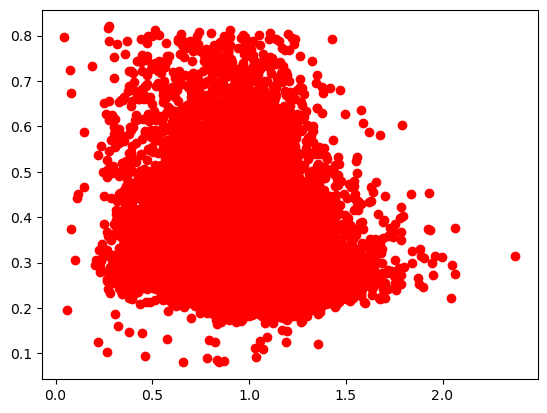

In [7]:
plt.figure()
plt.plot(df['igain'], df['isacc_rt'], 'ro')

     Condition  subjID    mean      se
0   NoTMS inVF       1  1.0909  0.0637
1   NoTMS inVF       6  1.5173  0.1014
2   NoTMS inVF       7  2.6596  0.1754
3   NoTMS inVF      14  2.3283  0.1305
4   NoTMS inVF      15  2.4366  0.1418
..         ...     ...     ...     ...
59  late outVF      14  1.6112  0.0716
60  late outVF      15  1.9930  0.1454
61  late outVF      25  2.0029  0.1082
62  late outVF      26  1.6892  0.1224
63  late outVF      27  1.8354  0.1167

[64 rows x 4 columns]


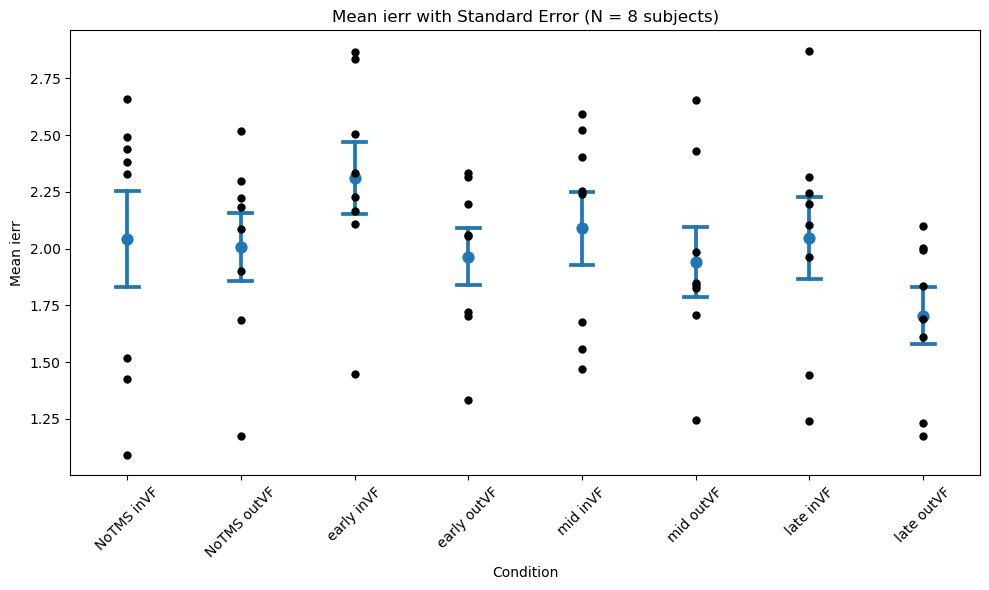

     Condition  subjID    mean      se
0   NoTMS inVF       1  1.0288  0.0558
1   NoTMS inVF       6  1.3175  0.0729
2   NoTMS inVF       7  1.6088  0.1121
3   NoTMS inVF      14  1.1925  0.0714
4   NoTMS inVF      15  1.8451  0.1238
..         ...     ...     ...     ...
59  late outVF      14  1.2191  0.0505
60  late outVF      15  1.6435  0.1182
61  late outVF      25  1.7691  0.0994
62  late outVF      26  1.1466  0.0968
63  late outVF      27  1.3041  0.0839

[64 rows x 4 columns]


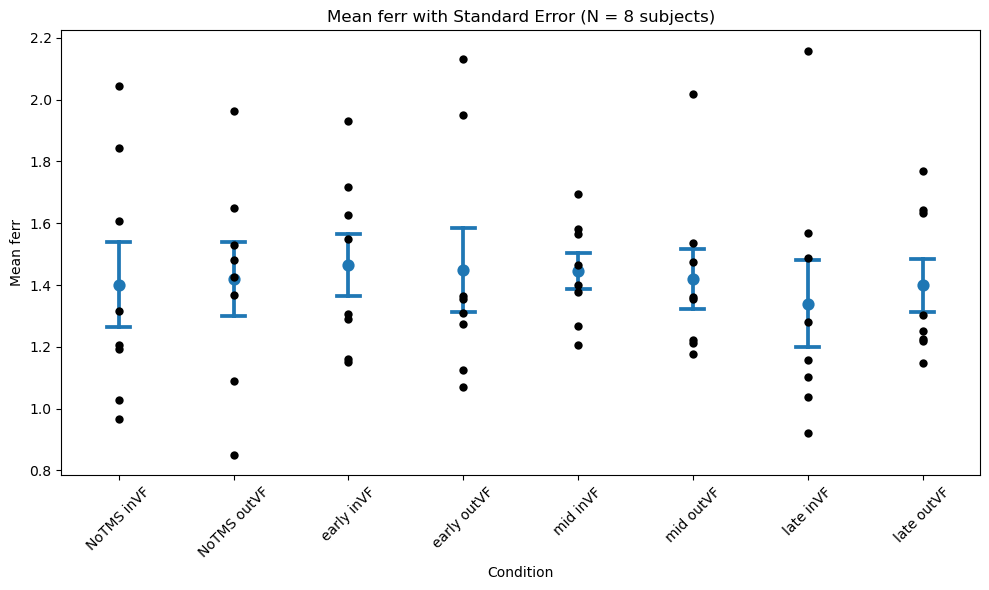

     Condition  subjID    mean      se
0   NoTMS inVF       1  0.2763  0.0048
1   NoTMS inVF       6  0.2726  0.0071
2   NoTMS inVF       7  0.3367  0.0086
3   NoTMS inVF      14  0.3058  0.0084
4   NoTMS inVF      15  0.3489  0.0065
..         ...     ...     ...     ...
59  late outVF      14  0.2586  0.0053
60  late outVF      15  0.3882  0.0109
61  late outVF      25  0.3174  0.0099
62  late outVF      26  0.3503  0.0117
63  late outVF      27  0.3530  0.0080

[64 rows x 4 columns]


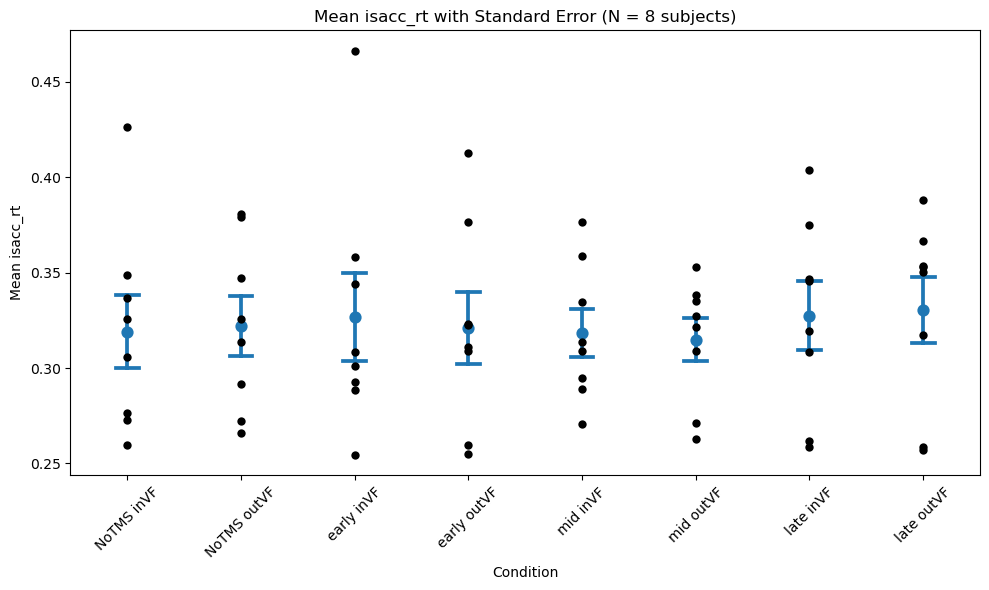

     Condition  subjID    mean      se
0   NoTMS inVF       1  0.3293  0.0101
1   NoTMS inVF       6  0.4485  0.0145
2   NoTMS inVF       7  0.5127  0.0146
3   NoTMS inVF      14  0.5177  0.0160
4   NoTMS inVF      15  0.5698  0.0175
..         ...     ...     ...     ...
59  late outVF      14  0.4570  0.0143
60  late outVF      15  0.4759  0.0154
61  late outVF      25  0.3751  0.0150
62  late outVF      26  0.5934  0.0140
63  late outVF      27  0.5081  0.0140

[64 rows x 4 columns]


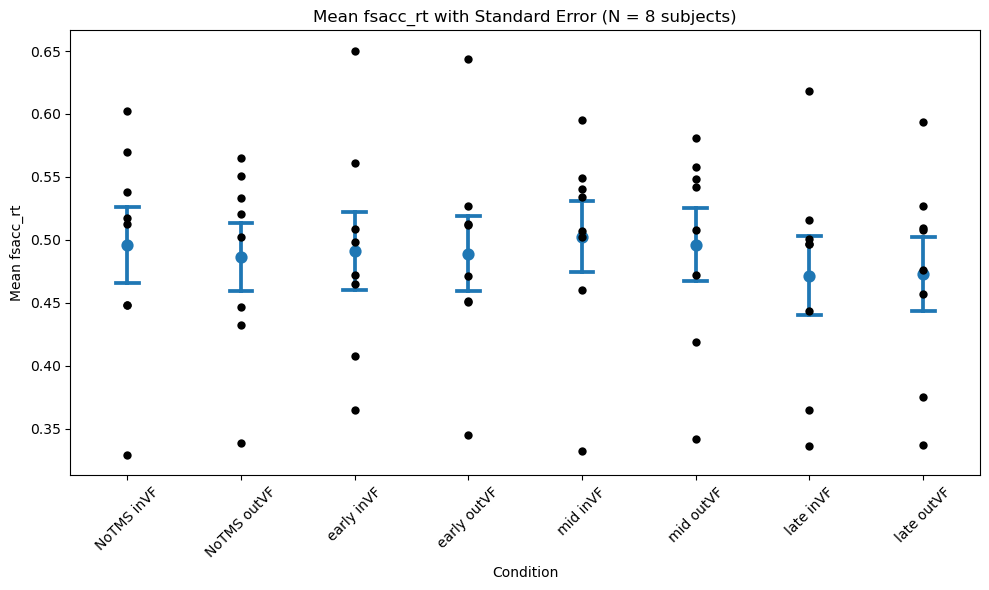

In [8]:
def calculate_mean_and_se(group, error_metric):
    mean = group[error_metric].mean()
    se = group[error_metric].sem()
    return pd.Series({'mean': mean, 'se': se})

def plot_error_metric(df, error_metric):
    subject_counts = df.groupby('subjID')['day'].nunique()
    valid_subjects = subject_counts[subject_counts == 5].index
    df_filtered = df[df['subjID'].isin(valid_subjects)  & (df['ispro'] == 1)]
    # conditions = {
    #     'No TMS': df_filtered[(df_filtered['TMS_condition'] == 'No TMS') & (df_filtered['day'].isin([1, 2, 3]))],
    #     'early inVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS intoVF') & (df_filtered['day'] == 4)],
    #     'early outVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS outVF') & (df_filtered['day'] == 4)],
    #     'mid inVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS intoVF') & (df_filtered['day'].isin([1, 2, 3]))],
    #     'mid outVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS outVF') & (df_filtered['day'].isin([1, 2, 3]))],
    #     'late inVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS intoVF') & (df_filtered['day'] == 5)],
    #     'late outVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS outVF') & (df_filtered['day'] == 5)],
    # }

    conditions = {
        'NoTMS inVF': df_filtered[(df_filtered['TMS_condition'] == 'No TMS') & (df_filtered['day'].isin([1, 2, 3])) & (df_filtered['instimVF'] == 1)],
        'NoTMS outVF': df_filtered[(df_filtered['TMS_condition'] == 'No TMS') & (df_filtered['day'].isin([1, 2, 3])) & (df_filtered['instimVF'] == 0)],
        'early inVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS intoVF') & (df_filtered['day'] == 4)],
        'early outVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS outVF') & (df_filtered['day'] == 4)],
        'mid inVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS intoVF') & (df_filtered['day'].isin([1, 2, 3]))],
        'mid outVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS outVF') & (df_filtered['day'].isin([1, 2, 3]))],
        'late inVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS intoVF') & (df_filtered['day'] == 5)],
        'late outVF': df_filtered[(df_filtered['TMS_condition'] == 'TMS outVF') & (df_filtered['day'] == 5)],
    }
    results = {cond: data.groupby('subjID').apply(calculate_mean_and_se, error_metric=error_metric) for cond, data in conditions.items()}

    combined_results = pd.concat(results, names=['Condition']).reset_index()
    print(combined_results)

    plt.figure(figsize=(10, 6))
    sns.pointplot(data=combined_results, x='Condition', y='mean', linestyle="none", capsize=.2, errorbar="se")
    sns.stripplot(data=combined_results, x='Condition', y='mean', color="black", jitter=False, size=6)
    # sns.lineplot(data=combined_results, x='Condition', y='mean', hue='subjID', 
    #               palette=['gray']*len(valid_subjects), legend=False, dashes=True, linewidth=1)


    plt.title(f'Mean {error_metric} with Standard Error (N = {len(valid_subjects)} subjects)')
    plt.ylabel(f'Mean {error_metric}')
    plt.xlabel('Condition')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
plot_error_metric(df, 'ierr')
plot_error_metric(df, 'ferr')
# plot_error_metric(df, 'igain')
# plot_error_metric(df, 'iamp')
plot_error_metric(df, 'isacc_rt')
plot_error_metric(df, 'fsacc_rt')

Prosaccade errors
[1.83091659 1.84631874 1.81059442]
[0.10777383 0.09331039 0.09875114]
Antisaccade errors
[2.17684694 2.22445703 2.13293666]
[0.12674178 0.11598366 0.12346488]


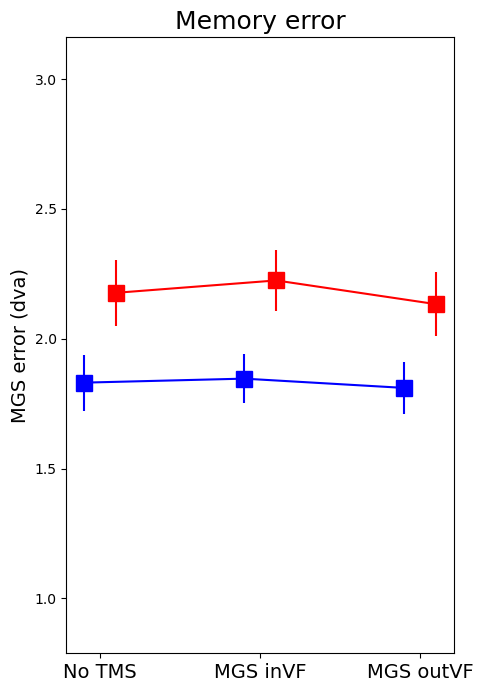

In [14]:
subject_wise_error_plot(df, 'isacc_err', normalizer = False, indiv_summary = False, remove_outliers = True)

## Visualize different metrics and their relationship with each other

In [ ]:
cols_to_plot = ['ierr', 'ferr', 'igain', 'fgain', 'ipea', 
                    'fpea', 'itheta', 'ftheta', 'iamp', 'famp', 
                    'idir', 'fdir', 'isacc_peakvel', 'fsacc_peakvel',
                    'isacc_rt', 'fsacc_rt']
   
# df['trial_type'].replace(['pro_intoVF', 'pro_outVF', 'anti_intoVF', 'anti_outVF'],
#                          [0, 1, 2, 3], inplace=True)
# df['TMS_condition'].replace(['No TMS', 'TMS intoVF', 'TMS outVF'],
#                      [0, 1, 2], inplace=True) 
pd.plotting.scatter_matrix(df[cols_to_plot], figsize = (25, 25), alpha = 0.8)
plt.show()

In [ ]:
df['condition'] = ''
df.loc[(df['istms'] == 0) & (df['ispro'] == 1) & (df['instimVF'] == 1), 'condition'] = 'NT_pin'
df.loc[(df['istms'] == 0) & (df['ispro'] == 1) & (df['instimVF'] == 0), 'condition'] = 'NT_pout'
df.loc[(df['istms'] == 0) & (df['ispro'] == 0) & (df['instimVF'] == 1), 'condition'] = 'NT_ain'
df.loc[(df['istms'] == 0) & (df['ispro'] == 0) & (df['instimVF'] == 0), 'condition'] = 'NT_aout'
df.loc[(df['istms'] == 1) & (df['ispro'] == 1) & (df['instimVF'] == 1), 'condition'] = 'T_pin'
df.loc[(df['istms'] == 1) & (df['ispro'] == 1) & (df['instimVF'] == 0), 'condition'] = 'T_pout'
df.loc[(df['istms'] == 1) & (df['ispro'] == 0) & (df['instimVF'] == 1), 'condition'] = 'T_ain'
df.loc[(df['istms'] == 1) & (df['ispro'] == 0) & (df['instimVF'] == 0), 'condition'] = 'T_aout'

In [ ]:
df['condition'] = ''
df.loc[(df['istms'] == 0) & (df['ispro'] == 1), 'condition'] = 'NT_p'
df.loc[(df['istms'] == 0) & (df['ispro'] == 0), 'condition'] = 'NT_a'
df.loc[(df['istms'] == 1) & (df['ispro'] == 1) & (df['instimVF'] == 1), 'condition'] = 'T_pin'
df.loc[(df['istms'] == 1) & (df['ispro'] == 1) & (df['instimVF'] == 0), 'condition'] = 'T_pout'
df.loc[(df['istms'] == 1) & (df['ispro'] == 0) & (df['instimVF'] == 1), 'condition'] = 'T_ain'
df.loc[(df['istms'] == 1) & (df['ispro'] == 0) & (df['instimVF'] == 0), 'condition'] = 'T_aout'
#df = df[(df['subjID'] != 13) | (df['subjID'] != 18)]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cp = ['ierr', 'ferr', 'igain', 'fgain', 'ipea', 
                    'fpea', 'itheta', 'ftheta', 'iamp', 'famp', 
                    'idir', 'fdir', 'isacc_peakvel', 'fsacc_peakvel',
                    'isacc_rt', 'fsacc_rt']
df_scaled = pd.DataFrame(scaler.fit_transform(df[ cp]), columns=cp)
df_scaled['condition'] = df['condition']
df_scaled['condition'].replace(['NT_p', 'NT_a',
                       'T_pin', 'T_pout', 'T_ain', 'T_aout'],
                     [0, 1, 2, 3, 4, 5], inplace=True) 

In [ ]:
from sklearn.ensemble import RandomForestClassifier as rfc
from sklearn.model_selection import train_test_split

df_temp = df_scaled#[((df_scaled['condition']==0) | (df_scaled['condition']==1) | (df_scaled['condition']==4) | (df_scaled['condition']==5))]
# cp = ['ierr', 'ferr', 'igain', 'fgain', 'ipea', 
#                     'fpea', 'itheta', 'ftheta', 'iamp', 'famp', 
#                     'idir', 'fdir', 'isacc_peakvel', 'fsacc_peakvel',
#                     'isacc_rt', 'fsacc_rt']
cp = ['ierr', 'igain', 'ipea', 'itheta', 'iamp', 
      'idir', 'isacc_peakvel', 'isacc_rt']
X = np.asarray(df_temp[cp])
y = np.asarray(pd.get_dummies(df_temp['condition'], columns = ['condition']))
#y = np.asarray(df_temp['condition'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
clf = rfc(random_state = 42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
score_val = clf.score(X_test, y_test)
print(score_val)

In [ ]:
importances = clf.feature_importances_

feature_names = cp  
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Sort the DataFrame by importance in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top N most important features
N = 10  # Change this value to get the desired number of features
top_features = feature_importances.head(N)
print(top_features)

In [ ]:
cp = ['ierr', 'igain', 'ipea', 'iamp', 
       'idir', 'condition']
df_temp = df_scaled[((df_scaled['condition']==0) | (df_scaled['condition']==1) | (df_scaled['condition']==4) | (df_scaled['condition']==5))]
pd.plotting.radviz(df_temp[cp], 'condition', s=2)

In [ ]:
df['condition'].replace(['NT_pin', 'NT_pout', 'NT_ain', 'NT_aout',
                       'T_pin', 'T_pout', 'T_ain', 'T_aout'],
                     [0, 1, 2, 3, 4, 5, 6, 7], inplace=True) 
cp = ['ierr', 'ferr', 'igain', 'fgain', 'ipea', 
                    'fpea', 'itheta', 'ftheta', 'iamp', 'famp', 
                    'idir', 'fdir', 'isacc_peakvel', 'fsacc_peakvel',
                    'isacc_rt', 'fsacc_rt', 'condition']
cp = ['ierr', 'igain', 'ipea', 'iamp', 
       'idir', 'condition']
df_temp = df[((df['condition']==0) | (df['condition']==1) | (df['condition']==4) | (df['condition']==5)) & (df['subjID']==1)]
pd.plotting.radviz(df_temp[cp], 'condition', s=2)

## Learning Curve

In [ ]:
save_folder = '/datc/MD_TMS_EEG/Figures/'
sub_list = np.unique(df['subjID'].values)
sub_list = [1, 3]
mov_window = 5 #Num trials
fig, axs = plt.subplots(len(sub_list), 3, figsize = (20, 7*len(sub_list)))
#plt.suptitle('Learning curve')
for sub in range(len(sub_list)):
    this_sub = sub_list[sub]
    for day in range(3):
        df_today_pro = df[(df['subjID'] == this_sub) & (df['day'] == day+1) & (df['ispro'] == 1)]
        df_today_anti = df[(df['subjID'] == this_sub) & (df['day'] == day+1) & (df['ispro'] == 0)]
        this_tr_num_pro = ((df_today_pro['rnum'] - 1) * 40 + df_today_pro['tnum'])
        this_tr_num_anti = ((df_today_anti['rnum'] - 1) * 40 + df_today_anti['tnum'])
        
        axs[sub, day].plot(this_tr_num_pro, df_today_pro['ierr'], 'ko', markersize = 2)
        axs[sub, day].plot(this_tr_num_anti, df_today_anti['ierr'], 'ro', markersize = 2)
        axs[sub, day].set_xlabel('trial')
        axs[sub, day].set_ylabel('MGS error (dva)')
        axs[sub, day].set_title('Sub = ' + str(this_sub) + ', Day = ' + str(day))
        #axs[sub, day].set_ylim([-0.2, 5])
#plt.savefig(save_folder + 'learning_curve.pdf', format="pdf", bbox_inches="tight")
plt.show()        

## Did subjects use semantic knowledge of target location?

In [ ]:
sub_list = np.unique(df['subjID'].values)
#sub_list = [1, 3]
fig, axs = plt.subplots(len(sub_list), 3, figsize = (20, 5*len(sub_list)))
x = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 2.1, 2.3, 2.5, 2.9, 3.1, 3.3]
bar_width = 0.2
labels = ['actual\nerror', 'semantic\nerror', 'max\nerror', 'actual\nerror', 'semantic\nerror', 'max\nerror',
          'actual\nerror', 'semantic\nerror', 'max\nerror', 'actual\nerror', 'semantic\nerror', 'max\nerror']

legend_handles = []
for sub in range(len(sub_list)):
    this_sub = sub_list[sub]
    for day in range(3):
        df_pro_instimVF = df[(df['subjID'] == this_sub) & (df['day'] == day+1) & (df['ispro'] == 1) & (df['instimVF'] == 1)]
        df_pro_outstimVF = df[(df['subjID'] == this_sub) & (df['day'] == day+1) & (df['ispro'] == 1) & (df['instimVF'] == 0)]
        df_anti_instimVF = df[(df['subjID'] == this_sub) & (df['day'] == day+1) & (df['ispro'] == 0) & (df['instimVF'] == 1)]
        df_anti_outstimVF = df[(df['subjID'] == this_sub) & (df['day'] == day+1) & (df['ispro'] == 0) & (df['instimVF'] == 0)]
        
        tr_num_pro_instimVF = ((df_pro_instimVF['rnum'] - 1) * 40 + df_pro_instimVF['tnum'])
        tr_num_pro_outstimVF = ((df_pro_outstimVF['rnum'] - 1) * 40 + df_pro_outstimVF['tnum'])
        tr_num_anti_instimVF = ((df_anti_instimVF['rnum'] - 1) * 40 + df_anti_instimVF['tnum'])
        tr_num_anti_outstimVF = ((df_anti_outstimVF['rnum'] - 1) * 40 + df_anti_outstimVF['tnum'])
        
        Xpi_sem = np.median(df_pro_instimVF['TarX'])
        Ypi_sem = np.median(df_pro_instimVF['TarY'])
        Xpo_sem = np.median(df_pro_outstimVF['TarX'])
        Ypo_sem = np.median(df_pro_outstimVF['TarY'])
        Xai_sem = np.median(df_anti_instimVF['TarX'])
        Yai_sem = np.median(df_anti_instimVF['TarY'])
        Xao_sem = np.median(df_anti_outstimVF['TarX'])
        Yao_sem = np.median(df_anti_outstimVF['TarY'])

        errpi_sem = np.sqrt((df_pro_instimVF['isaccX']-Xpi_sem)**2+(df_pro_instimVF['isaccY']-Ypi_sem)**2)
        errpo_sem = np.sqrt((df_pro_outstimVF['isaccX']-Xpo_sem)**2+(df_pro_outstimVF['isaccY']-Ypo_sem)**2)
        errai_sem = np.sqrt((df_anti_instimVF['isaccX']-Xai_sem)**2+(df_anti_instimVF['isaccY']-Yai_sem)**2)
        errao_sem = np.sqrt((df_anti_outstimVF['isaccX']-Xao_sem)**2+(df_anti_outstimVF['isaccY']-Yao_sem)**2)
        
        tarpi_sem = np.sqrt((df_pro_instimVF['TarX']-Xpi_sem)**2+(df_pro_instimVF['TarY']-Ypi_sem)**2)
        tarpo_sem = np.sqrt((df_pro_outstimVF['TarX']-Xpo_sem)**2+(df_pro_outstimVF['TarY']-Ypo_sem)**2)
        tarai_sem = np.sqrt((df_anti_instimVF['TarX']-Xai_sem)**2+(df_anti_instimVF['TarY']-Yai_sem)**2)
        tarao_sem = np.sqrt((df_anti_outstimVF['TarX']-Xao_sem)**2+(df_anti_outstimVF['TarY']-Yao_sem)**2)
        

        errpi = df_pro_instimVF['ierr']
        errpo = df_pro_outstimVF['ierr']
        errai = df_anti_instimVF['ierr']
        errao = df_anti_outstimVF['ierr']
        
        
        pi_mean = [np.mean(errpi), np.mean(errpi_sem), np.mean(tarpi_sem)]
        po_mean = [np.mean(errpo), np.mean(errpo_sem), np.mean(tarpo_sem)]
        ai_mean = [np.mean(errai), np.mean(errai_sem), np.mean(tarai_sem)]
        ao_mean = [np.mean(errao), np.mean(errao_sem), np.mean(tarao_sem)]
        pi_var = [sem(errpi), sem(errpi_sem), sem(tarpi_sem)]
        po_var = [sem(errpo), sem(errpo_sem), sem(tarpo_sem)]
        ai_var = [sem(errai), sem(errai_sem), sem(tarai_sem)]
        ao_var = [sem(errao), sem(errao_sem), sem(tarao_sem)]
        
        bar1 = axs[sub, day].bar(x[:3], pi_mean, bar_width, label='pro instimVF', yerr=pi_var, capsize=5)
        bar2 = axs[sub, day].bar(x[3:6], po_mean, bar_width, label='pro outstimVF', yerr=po_var, capsize=5)
        bar3 = axs[sub, day].bar(x[6:9], ai_mean, bar_width, label='anti instimVF', yerr=ai_var, capsize=5)
        bar4 = axs[sub, day].bar(x[9:], ao_mean, bar_width, label='anti outstimVF', yerr=ao_var, capsize=5)
        legend_handles.extend([bar1, bar2, bar3, bar4])
        axs[sub, day].set_ylabel('isacc_err')
        axs[sub, day].set_title('Sub = ' + str(this_sub) + ', Day = ' + str(day))
        axs[sub, day].set_xticks(x)
        axs[sub, day].set_xticklabels(labels, rotation = 45)
        #axs[sub, day].legend()
fig.legend(legend_handles, ['pro instimVF', 'pro outstimVF', 'anti instimVF', 'anti outstimVF'],
           loc='upper right', bbox_to_anchor=(1.0, 1.0))
# for ax in axs[-1]:
#     ax.set_xticklabels(labels, rotation=45, ha='right')  # Adjust rotation angle as needed

plt.subplots_adjust(right=0.85)  

#fig.suptitle('Learning curve')
plt.tight_layout(rect=[0, 0, 0.9, 1.0])  # Adjust the rect parameter as needed
plt.savefig(save_folder + 'semantic_strategy.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
sub_list = np.unique(df['subjID'].values)
#sub_list = [1, 3]
fig, axs = plt.subplots(len(sub_list), 1, figsize = (20, 5*len(sub_list)))
x = [0.5, 0.7, 0.9, 1.3, 1.5, 1.7, 2.1, 2.3, 2.5, 2.9, 3.1, 3.3]
bar_width = 0.2
labels = ['actual\nerror', 'semantic\nerror', 'centroid\nerror', 'actual\nerror', 'semantic\nerror', 'centroid\nerror',
          'actual\nerror', 'semantic\nerror', 'centroid\nerror', 'actual\nerror', 'semantic\nerror', 'centroid\nerror']

legend_handles = []
for sub in range(len(sub_list)):
    this_sub = sub_list[sub]
    #for day in range(3):
    df_pro_instimVF = df[(df['subjID'] == this_sub) & (df['ispro'] == 1) & (df['instimVF'] == 1)]
    df_pro_outstimVF = df[(df['subjID'] == this_sub)  & (df['ispro'] == 1) & (df['instimVF'] == 0)]
    df_anti_instimVF = df[(df['subjID'] == this_sub) & (df['ispro'] == 0) & (df['instimVF'] == 1)]
    df_anti_outstimVF = df[(df['subjID'] == this_sub) & (df['ispro'] == 0) & (df['instimVF'] == 0)]
    
    tr_num_pro_instimVF = ((df_pro_instimVF['rnum'] - 1) * 40 + df_pro_instimVF['tnum'])
    tr_num_pro_outstimVF = ((df_pro_outstimVF['rnum'] - 1) * 40 + df_pro_outstimVF['tnum'])
    tr_num_anti_instimVF = ((df_anti_instimVF['rnum'] - 1) * 40 + df_anti_instimVF['tnum'])
    tr_num_anti_outstimVF = ((df_anti_outstimVF['rnum'] - 1) * 40 + df_anti_outstimVF['tnum'])
    
    Xpi_sem = np.median(df_pro_instimVF['TarX'])
    Ypi_sem = np.median(df_pro_instimVF['TarY'])
    Xpo_sem = np.median(df_pro_outstimVF['TarX'])
    Ypo_sem = np.median(df_pro_outstimVF['TarY'])
    Xai_sem = np.median(df_anti_instimVF['TarX'])
    Yai_sem = np.median(df_anti_instimVF['TarY'])
    Xao_sem = np.median(df_anti_outstimVF['TarX'])
    Yao_sem = np.median(df_anti_outstimVF['TarY'])

    errpi_sem = np.sqrt((df_pro_instimVF['isaccX']-Xpi_sem)**2+(df_pro_instimVF['isaccY']-Ypi_sem)**2)
    errpo_sem = np.sqrt((df_pro_outstimVF['isaccX']-Xpo_sem)**2+(df_pro_outstimVF['isaccY']-Ypo_sem)**2)
    errai_sem = np.sqrt((df_anti_instimVF['isaccX']-Xai_sem)**2+(df_anti_instimVF['isaccY']-Yai_sem)**2)
    errao_sem = np.sqrt((df_anti_outstimVF['isaccX']-Xao_sem)**2+(df_anti_outstimVF['isaccY']-Yao_sem)**2)
    
    tarpi_sem = np.sqrt((df_pro_instimVF['TarX']-Xpi_sem)**2+(df_pro_instimVF['TarY']-Ypi_sem)**2)
    tarpo_sem = np.sqrt((df_pro_outstimVF['TarX']-Xpo_sem)**2+(df_pro_outstimVF['TarY']-Ypo_sem)**2)
    tarai_sem = np.sqrt((df_anti_instimVF['TarX']-Xai_sem)**2+(df_anti_instimVF['TarY']-Yai_sem)**2)
    tarao_sem = np.sqrt((df_anti_outstimVF['TarX']-Xao_sem)**2+(df_anti_outstimVF['TarY']-Yao_sem)**2)
    

    errpi = df_pro_instimVF['ierr']
    errpo = df_pro_outstimVF['ierr']
    errai = df_anti_instimVF['ierr']
    errao = df_anti_outstimVF['ierr']
    
    
    pi_mean = [np.mean(errpi), np.mean(errpi_sem), np.mean(tarpi_sem)]
    po_mean = [np.mean(errpo), np.mean(errpo_sem), np.mean(tarpo_sem)]
    ai_mean = [np.mean(errai), np.mean(errai_sem), np.mean(tarai_sem)]
    ao_mean = [np.mean(errao), np.mean(errao_sem), np.mean(tarao_sem)]
    pi_var = [sem(errpi), sem(errpi_sem), sem(tarpi_sem)]
    po_var = [sem(errpo), sem(errpo_sem), sem(tarpo_sem)]
    ai_var = [sem(errai), sem(errai_sem), sem(tarai_sem)]
    ao_var = [sem(errao), sem(errao_sem), sem(tarao_sem)]
    
    bar1 = axs[sub].bar(x[:3], pi_mean, bar_width, label='pro instimVF', yerr=pi_var, capsize=5)
    bar2 = axs[sub].bar(x[3:6], po_mean, bar_width, label='pro outstimVF', yerr=po_var, capsize=5)
    bar3 = axs[sub].bar(x[6:9], ai_mean, bar_width, label='anti instimVF', yerr=ai_var, capsize=5)
    bar4 = axs[sub].bar(x[9:], ao_mean, bar_width, label='anti outstimVF', yerr=ao_var, capsize=5)
    legend_handles.extend([bar1, bar2, bar3, bar4])
    axs[sub].set_ylabel('isacc_err')
    axs[sub].set_title('Sub = ' + str(this_sub))
    axs[sub].set_xticks(x)
    axs[sub].set_xticklabels(labels)
        #axs[sub, day].legend()
fig.legend(legend_handles, ['pro instimVF', 'pro outstimVF', 'anti instimVF', 'anti outstimVF'],
           loc='upper right', bbox_to_anchor=(1.0, 1.0))
# for ax in axs[-1]:
#     ax.set_xticklabels(labels, rotation=45, ha='right')  # Adjust rotation angle as needed

plt.subplots_adjust(right=0.85)  

#fig.suptitle('Learning curve')
plt.tight_layout(rect=[0, 0, 0.9, 1.0])  # Adjust the rect parameter as needed
plt.savefig(save_folder + 'semantic_strategy_subjectwise.pdf', format="pdf", bbox_inches="tight")
plt.show()

In [ ]:
X1 = [0.3, 0.8, 1.3]
bWidth = 0.2
X2 = [round(x + 0.1, 1) for x in X1]
X_sum = [sum(value) for value in zip(X1, X2)]
x_tick_pos = [round(x/2, 2) for x in X1]
x_label_names = ['No TMS', 'MGS inVF', 'MGS outVF']
Y1_equal = [1, 1, 1]
Y1_specific = [1, 2, 1]
Y1_global = [1, 2, 2]

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
fig.patch.set_facecolor((33/255, 33/255, 33/255))
axes_fontsize = 12
title_fontsize = 16
for ii in range(3):
    ax[ii].set_facecolor((33/255, 33/255, 33/255))
    ax[ii].spines['bottom'].set_color('white')
    ax[ii].spines['top'].set_color('white')
    ax[ii].spines['left'].set_color('white')
    ax[ii].spines['right'].set_color('white')
    ax[ii].xaxis.label.set_color('white')
    ax[ii].yaxis.label.set_color('white')
    ax[ii].tick_params(axis='x', colors='white')
    ax[ii].tick_params(axis='y', colors=(33/255, 33/255, 33/255))
    ax[ii].set_ylim((0, 2.2))
    ax[ii].set_xticks(X1, x_label_names, fontsize=axes_fontsize)
    ax[ii].set_ylabel('MGS error', fontsize=axes_fontsize, labelpad=-20)
    if ii == 0:
        bars = ax[ii].bar(X1, Y1_equal, width = bWidth)
        ax[ii].set_title('No effect', color = 'white', fontsize=title_fontsize)
    elif ii == 1:
        bars = ax[ii].bar(X1, Y1_specific, width = bWidth)
        ax[ii].set_title('Specific', color = 'white', fontsize=title_fontsize)
    elif ii == 2:
        bars = ax[ii].bar(X1, Y1_global, width = bWidth)
        ax[ii].set_title('Global', color = 'white', fontsize=title_fontsize)
    
    bars[0].set_color("#1B9E77")
    bars[1].set_color("#D95F02")
    bars[2].set_color("#7570B3")
plt.show()

In [ ]:
d_good = df[df['subjID'] != 18]
pro_rt = d_good[(d_good['ispro']==1) & (d_good['istms']== 0) & (d_good['instimVF'] == 1)]['isacc_rt']
anti_rt = d_good[(d_good['ispro']==0) & (d_good['istms']== 1) & (d_good['instimVF'] == 1)]['isacc_rt']

max_rt = max(np.max(pro_rt), np.max(anti_rt))
#print(max_rt)
nbins = 50
t_bins = np.linspace(0, max_rt, nbins)
t_res = 1/nbins
p_count = np.zeros((nbins, 1))
a_count = np.zeros((nbins, 1))
for ii in range(nbins):
    p_count[ii] = len(np.where((t_bins[ii]<pro_rt) & (pro_rt<t_bins[ii]+t_res))[0])
    a_count[ii] = len(np.where((t_bins[ii]<anti_rt) & (anti_rt<t_bins[ii]+t_res))[0])
p_count = np.cumsum(p_count)/len(pro_rt) * 100
a_count = np.cumsum(a_count)/len(anti_rt) * 100
print('Pro-saccade equivalence point: ' + str(int(round(t_bins[np.where(p_count < 75)[0][-1]]*1000, 0))) + 's')
print('Anti-saccade equivalence point: ' + str(int(round(t_bins[np.where(a_count < 75)[0][-1]]*1000, 0))) + 's')

plt.figure()
plt.plot(t_bins*1000, p_count, 'b-')
plt.plot(t_bins*1000, a_count, 'r-')
plt.xlabel('RT (ms)')
plt.ylabel('% Cummulative')
plt.title('No TMS')
plt.show()

In [ ]:
cp = ['ierr', 'ferr', 'igain', 'fgain', 'ipea', 
                    'fpea', 'itheta', 'ftheta', 'iamp', 'famp', 
                    'idir', 'fdir', 'isacc_peakvel', 'fsacc_peakvel',
                    'isacc_rt', 'fsacc_rt']

In [ ]:
df['condition'] = ''
df.loc[(df['istms'] == 0) & (df['instimVF'] == 1), 'condition'] = 'NoTMS inVF'
df.loc[(df['istms'] == 0) & (df['instimVF'] == 0), 'condition'] = 'NoTMS outVF'
df.loc[(df['istms'] == 1) & (df['instimVF'] == 1), 'condition'] = 'TMS inVF'
df.loc[(df['istms'] == 1) & (df['instimVF'] == 0), 'condition'] = 'TMS outVF'

In [ ]:
df['condition'] = ''
df.loc[(df['istms'] == 0), 'condition'] = 'NoTMS'
df.loc[(df['istms'] == 1) & (df['instimVF'] == 1), 'condition'] = 'TMS inVF'
df.loc[(df['istms'] == 1) & (df['instimVF'] == 0), 'condition'] = 'TMS outVF'

In [ ]:
averaged_df = df.groupby(['subjID', 'istms', 'ispro'])['ierr'].mean().reset_index()
averaged_df.head()

In [ ]:
metrics = ['ierr', 'ferr', 'igain', 'fgain', 'ipea', 
                    'fpea', 'itheta', 'ftheta', 'iamp', 'famp', 
                    'idir', 'fdir', 'isacc_peakvel', 'fsacc_peakvel',
                    'isacc_rt', 'fsacc_rt']
x_order = ['NoTMS', 'TMS inVF', 'TMS outVF']

N1 = [1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4] # num rows for tiled plot
N2 = [1, 2, 2, 2, 3, 3, 4, 4, 3, 5, 4, 4, 5, 5, 5, 4, 5, 5, 5, 5] # num cols for tiled plot
nrows = N1[len(metrics)-1]
ncols = N2[len(metrics)-1]
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 20))
for ss in range(len(metrics)):
    ax = axes[ss // ncols, ss % ncols]
    err_metric = metrics[ss]
    summary_df = df.groupby(['subjID', 'istms', 'ispro', 'instimVF'])[err_metric].median().reset_index()
    summary_df['condition'] = ''
    summary_df.loc[(summary_df['istms'] == 0) , 'condition'] = 'NoTMS'
    summary_df.loc[(summary_df['istms'] == 1) & (summary_df['instimVF'] == 1), 'condition'] = 'TMS inVF'
    summary_df.loc[(summary_df['istms'] == 1) & (summary_df['instimVF'] == 0), 'condition'] = 'TMS outVF'
    sns.boxplot(summary_df, x = 'condition', y = err_metric, hue = 'ispro', fill = False, 
                gap = 0.2, showfliers=True, order=x_order, hue_order = [1, 0], ax=ax, legend=False)
    # sns.boxenplot(summary_df, x = 'condition', y = err_metric, hue = 'ispro', fill = False, 
    #             gap = 0.2, showfliers=True, order=x_order, hue_order = [1, 0], ax=ax, legend=False)

    ax.set_ylabel(err_metric, fontsize = axes_fontsize)
plt.tight_layout()

plt.show()

In [ ]:
subject_wise_error_plot(df, 'ierr', normalizer = False, indiv_summary = False, remove_outliers = True)

In [ ]:
subject_wise_error_plot(df[df['subjID'] != 18], 'isacc_err', normalizer = False, indiv_summary = False, remove_outliers = True)

In [ ]:
X1 = [0.3, 0.8, 1.3]
X2 = [round(x + 0.1, 1) for x in X1]
X_sum = [sum(value) for value in zip(X1, X2)]
x_tick_pos = [round(x/2, 2) for x in X_sum]
print(X2, x_tick_pos)

In [ ]:
subject_wise_error_plot(df[df['subjID'] != 18], 'fsacc_err', normalizer = False, indiv_summary = False, remove_outliers = True)

In [ ]:
df_filtered_good = df[df['subjID'] == 1]
plt.figure(figsize=(10, 10))
plt.plot(df_filtered_good['isacc_rt'], np.log(df_filtered_good['isacc_err']), 'r.', markersize=5)
plt.ylabel('Saccade error (dva)')
plt.xlabel('RT (s)')
plt.title('Speed accuracy curve')

In [ ]:
subject_wise_error_plot(df[df['subjID'] != 18], 'fsacc_err', normalizer = 'individualized', indiv_summary = True, remove_outliers = False)

In [ ]:
raw_error_summary = pd.pivot_table(df, values = ['fsacc_err', 'fsacc_theta_err', 'fsacc_radius_err'], index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.nanmean(np.abs(x)))
raw_error_summary

In [ ]:
error_summary = pd.pivot_table(df, values = ['fsacc_theta_rot_normed', 'fsacc_theta_rot'], index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: np.nanmean(np.abs(x)))
error_summary

In [ ]:
df.describe()
df.describe(include=object)

In [ ]:
subjIDs = df['subjID'].unique()
subjIDs = [1, 3, 25]
#df_filtered = df_filtered[df_filtered['instimVF'] == 0 ]
for ii in range(len(subjIDs)):
    plt.figure()
    plt.plot(df[df['subjID']==subjIDs[ii]]['TarX'], df[df['subjID']==subjIDs[ii]]['TarY'], 'r.', markersize = 2)
    plt.plot(df[df['subjID']==subjIDs[ii]]['isaccX'], df[df['subjID']==subjIDs[ii]]['isaccY'], 'ks', markersize = 2)
    plt.xlim(-25, 25)
    plt.ylim(-20, 20)
    plt.title(str(subjIDs[ii]))

In [ ]:
df.columns

In [ ]:
subjIDs = df['subjID'].unique()
subjIDs = [1, 3, 25]
#df_filtered = df_filtered[df_filtered['instimVF'] == 0 ]
for ii in range(len(subjIDs)):
    plt.figure()
    plt.plot(df[df['subjID']==subjIDs[ii]]['TarX_rotated'], df[df['subjID']==subjIDs[ii]]['TarY_rotated'], 'r.', markersize = 2)
    plt.plot(df[df['subjID']==subjIDs[ii]]['isaccX_rotated'], df[df['subjID']==subjIDs[ii]]['isaccY_rotated'], 'ks', alpha = 0.5, markersize = 2)
    plt.xlim(-25, 25)
    plt.ylim(-20, 20)
    plt.title(str(subjIDs[ii]))

In [ ]:
import numpy as np
from scipy.stats import wasserstein_distance as wsd

def sliced_wasserstein(X, Y, num_proj):
    dim = X.shape[1]
    ests = []
    for _ in range(num_proj):
        # sample uniformly from the unit sphere
        dir = np.random.randn(dim)
        dir /= np.linalg.norm(dir)

        # project the data
        X_proj = X @ dir
        Y_proj = Y @ dir

        # compute 1d wasserstein
        ests.append(wsd(X_proj, Y_proj))
    return np.mean(ests)

In [ ]:
tar = np.random.randn(1000, 2)
sacc1 = [2,2]+1.5*np.random.randn(1000, 2)
sacc2 = [-2,-2]+1.5*np.random.randn(1000, 2)
sacc3 = [0,0]+1.5*np.random.randn(1000, 2)
sacc4 = np.random.randn(1000, 2)

fig = plt.figure()
plt.plot(tar[:, 0], tar[:, 1], 'ro', markersize = 2)
plt.plot(sacc1[:, 0], sacc1[:, 1], 'ko', markersize = 2)
plt.plot(sacc2[:, 0], sacc2[:, 1], 'mo', markersize = 2)
plt.plot(sacc3[:, 0], sacc3[:, 1], 'bo', markersize = 2)
plt.plot(sacc4[:, 0], sacc4[:, 1], 'go', markersize = 2)

plt.axis('equal')
plt.show()

In [ ]:
def euc_err(x, y1, y2, y3, y4):
    err1 = np.sqrt((x-np.mean(x))**2+(y1-np.mean(y1))**2)
    err2 = np.sqrt((x-np.mean(x))**2+(y2-np.mean(y2))**2)
    err3 = np.sqrt((x-np.mean(x))**2+(y3-np.mean(y3))**2)
    err4 = np.sqrt((x-np.mean(x))**2+(y4-np.mean(y4))**2)
    err = [np.mean(err1), np.mean(err2), np.mean(err3), np.mean(err4)]
    return err

In [ ]:
reg_err = euc_err(tar, sacc1, sacc2, sacc3, sacc4)
print(reg_err)

In [ ]:
from scipy import stats

for ii in range(1):
    df_this = df[df['subjID']==subjIDs[ii]]
    df_nt_ivf_pro = df_this[(df_this['istms']==0) & (df_this['instimVF']== 1) & (df_this['ispro']== 1)]
    df_nt_ovf_pro = df_this[(df_this['istms']==0) & (df_this['instimVF']== 0) & (df_this['ispro']== 1)]
    df_nt_ivf_anti = df_this[(df_this['istms']==0) & (df_this['instimVF']== 1) & (df_this['ispro']== 0)]
    df_nt_ovf_anti = df_this[(df_this['istms']==0) & (df_this['instimVF']== 0) & (df_this['ispro']== 0)]
    df_t_ivf_pro = df_this[(df_this['istms']==1) & (df_this['instimVF']== 1) & (df_this['ispro']== 1)]
    df_t_ovf_pro = df_this[(df_this['istms']==1) & (df_this['instimVF']== 0) & (df_this['ispro']== 1)]
    df_t_ivf_anti = df_this[(df_this['istms']==1) & (df_this['instimVF']== 1) & (df_this['ispro']== 0)]
    df_t_ovf_anti = df_this[(df_this['istms']==1) & (df_this['instimVF']== 0) & (df_this['ispro']== 0)]
    tarXY = df_nt_ivf_pro[['isaccX', 'isaccY']].values
    xmin = 0#tarXY[:, 0].min()
    xmax = 20#tarXY[:, 0].max()
    ymin = -10#tarXY[:, 1].min()
    ymax = 10#tarXY[:, 1].max()
    #print(xmin)
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    pos = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([tarXY[:, 0], tarXY[:, 1]])
    kernel = stats.gaussian_kde(values)
    Z = np.reshape(kernel.evaluate(pos).T, X.shape)
    fig = plt.figure(figsize = (5, 5))
    ax = fig.add_subplot(111)
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_stern, extent=[xmin, xmax, ymin, ymax])
    ax.plot(tarXY[:, 0], tarXY[:, 1], 'k.', markersize = 2)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    plt.show()
    #isaccXY = df_nt_ivf_pro[['isaccX', 'isaccY']].values


In [ ]:
print(kernel())

In [ ]:
for ii in range(1):
    df_this = df[df['subjID']==subjIDs[ii]]
    df_nt_ivf_pro = df_this[(df_this['istms']==0) & (df_this['instimVF']== 1) & (df_this['ispro']== 1)]
    df_nt_ovf_pro = df_this[(df_this['istms']==0) & (df_this['instimVF']== 0) & (df_this['ispro']== 1)]
    df_nt_ivf_anti = df_this[(df_this['istms']==0) & (df_this['instimVF']== 1) & (df_this['ispro']== 0)]
    df_nt_ovf_anti = df_this[(df_this['istms']==0) & (df_this['instimVF']== 0) & (df_this['ispro']== 0)]
    df_t_ivf_pro = df_this[(df_this['istms']==1) & (df_this['instimVF']== 1) & (df_this['ispro']== 1)]
    df_t_ovf_pro = df_this[(df_this['istms']==1) & (df_this['instimVF']== 0) & (df_this['ispro']== 1)]
    df_t_ivf_anti = df_this[(df_this['istms']==1) & (df_this['instimVF']== 1) & (df_this['ispro']== 0)]
    df_t_ovf_anti = df_this[(df_this['istms']==1) & (df_this['instimVF']== 0) & (df_this['ispro']== 0)]

    emd_nt_ivf_pro = sliced_wasserstein(df_nt_ivf_pro[['isaccX', 'isaccY']].values, df_nt_ivf_pro[['TarX', 'TarY']].values, 1000)
    emd_nt_ovf_pro = sliced_wasserstein(df_nt_ovf_pro[['isaccX', 'isaccY']].values, df_nt_ovf_pro[['TarX', 'TarY']].values, 1000)
    emd_nt_ivf_anti = sliced_wasserstein(df_nt_ivf_anti[['isaccX', 'isaccY']].values, df_nt_ivf_anti[['TarX', 'TarY']].values, 1000)
    emd_nt_ovf_anti = sliced_wasserstein(df_nt_ovf_anti[['isaccX', 'isaccY']].values, df_nt_ovf_anti[['TarX', 'TarY']].values, 1000)
    emd_t_ivf_pro = sliced_wasserstein(df_t_ivf_pro[['isaccX', 'isaccY']].values, df_t_ivf_pro[['TarX', 'TarY']].values, 1000)
    emd_t_ovf_pro = sliced_wasserstein(df_t_ovf_pro[['isaccX', 'isaccY']].values, df_t_ovf_pro[['TarX', 'TarY']].values, 1000)
    emd_t_ivf_anti = sliced_wasserstein(df_t_ivf_anti[['isaccX', 'isaccY']].values, df_t_ivf_anti[['TarX', 'TarY']].values, 1000)
    emd_t_ovf_anti = sliced_wasserstein(df_t_ovf_anti[['isaccX', 'isaccY']].values, df_t_ovf_anti[['TarX', 'TarY']].values, 1000)
    
    print([[emd_nt_ivf_pro, emd_nt_ovf_pro], [emd_nt_ivf_anti, emd_nt_ovf_anti], 
           [emd_t_ivf_pro, emd_t_ovf_pro], [emd_t_ivf_anti, emd_t_ovf_anti]])  

In [ ]:
XY = df_nt_ivf_pro[['isaccX', 'isaccY']].values
print(XY[:,0])

In [ ]:
print(df_nt_ivf_pro[['isaccX', 'isaccY']].values)

In [ ]:
subjIDs = df['subjID'].unique()
save_folder = '/datc/MD_TMS_EEG/Figures/'

#df_filtered = df_filtered[(df_filtered['TarTheta'] > -np.pi/2) & (df_filtered['TarTheta'] < np.pi/2) ]
#for ii in range(len(subjIDs)):
x_bd = [-5, 20]
y_bd = [-5, 5]
for ii in range(len(subjIDs)):
    df_this = df[df['subjID']==subjIDs[ii]]
    df_nt_ivf_pro = df_this[(df_this['istms']==0) & (df_this['instimVF']== 1) & (df_this['ispro']== 1)]
    df_nt_ovf_pro = df_this[(df_this['istms']==0) & (df_this['instimVF']== 0) & (df_this['ispro']== 1)]
    df_nt_ivf_anti = df_this[(df_this['istms']==0) & (df_this['instimVF']== 1) & (df_this['ispro']== 0)]
    df_nt_ovf_anti = df_this[(df_this['istms']==0) & (df_this['instimVF']== 0) & (df_this['ispro']== 0)]
    df_t_ivf_pro = df_this[(df_this['istms']==1) & (df_this['instimVF']== 1) & (df_this['ispro']== 1)]
    df_t_ovf_pro = df_this[(df_this['istms']==1) & (df_this['instimVF']== 0) & (df_this['ispro']== 1)]
    df_t_ivf_anti = df_this[(df_this['istms']==1) & (df_this['instimVF']== 1) & (df_this['ispro']== 0)]
    df_t_ovf_anti = df_this[(df_this['istms']==1) & (df_this['instimVF']== 0) & (df_this['ispro']== 0)]
    fig, ax = plt.subplots(nrows = 2, ncols = 4, figsize = (15, 10))
    ax[0,0].plot(df_nt_ivf_pro['TarX_rotated'], df_nt_ivf_pro['TarY_rotated'], 'ro', markersize = 4)
    ax[0,0].plot(df_nt_ivf_pro['fsaccX_rotated'], df_nt_ivf_pro['fsaccY_rotated'], 'ks', markersize = 2)
    ax[0,0].set_xlim(x_bd)
    ax[0,0].set_ylim(y_bd)
    ax[0,0].set_title('NoTMS pro intoVF')

    ax[0,1].plot(df_t_ivf_pro['TarX_rotated'], df_t_ivf_pro['TarY_rotated'], 'ro', markersize = 4)
    ax[0,1].plot(df_t_ivf_pro['fsaccX_rotated'], df_t_ivf_pro['fsaccY_rotated'], 'ks', markersize = 2)
    ax[0,1].set_xlim(x_bd)
    ax[0,1].set_ylim(y_bd)
    ax[0,1].set_title('TMS pro intoVF')

    ax[0,2].plot(df_nt_ivf_anti['TarX_rotated'], df_nt_ivf_anti['TarY_rotated'], 'ro', markersize = 4)
    ax[0,2].plot(df_nt_ivf_anti['fsaccX_rotated'], df_nt_ivf_anti['fsaccY_rotated'], 'ks', markersize = 2)
    ax[0,2].set_xlim(x_bd)
    ax[0,2].set_ylim(y_bd)
    ax[0,2].set_title('NoTMS anti intoVF')

    ax[0,3].plot(df_t_ivf_anti['TarX_rotated'], df_t_ivf_anti['TarY_rotated'], 'ro', markersize = 4)
    ax[0,3].plot(df_t_ivf_anti['fsaccX_rotated'], df_t_ivf_anti['fsaccY_rotated'], 'ks', markersize = 2)
    ax[0,3].set_xlim(x_bd)
    ax[0,3].set_ylim(y_bd)
    ax[0,3].set_title('TMS anti intoVF')

    ax[1,0].plot(df_nt_ovf_pro['TarX_rotated'], df_nt_ovf_pro['TarY_rotated'], 'ro', markersize = 4)
    ax[1,0].plot(df_nt_ovf_pro['fsaccX_rotated'], df_nt_ovf_pro['fsaccY_rotated'], 'ks', markersize = 2)
    ax[1,0].set_xlim(x_bd)
    ax[1,0].set_ylim(y_bd)
    ax[1,0].set_title('NoTMS pro outVF')

    ax[1,1].plot(df_t_ovf_pro['TarX_rotated'], df_t_ovf_pro['TarY_rotated'], 'ro', markersize = 4)
    ax[1,1].plot(df_t_ovf_pro['fsaccX_rotated'], df_t_ovf_pro['fsaccY_rotated'], 'ks', markersize = 2)
    ax[1,1].set_xlim(x_bd)
    ax[1,1].set_ylim(y_bd)
    ax[1,1].set_title('TMS pro outVF')

    ax[1,2].plot(df_nt_ovf_anti['TarX_rotated'], df_nt_ovf_anti['TarY_rotated'], 'ro', markersize = 4)
    ax[1,2].plot(df_nt_ovf_anti['fsaccX_rotated'], df_nt_ovf_anti['fsaccY_rotated'], 'ks', markersize = 2)
    ax[1,2].set_xlim(x_bd)
    ax[1,2].set_ylim(y_bd)
    ax[1,2].set_title('NoTMS anti outVF')

    ax[1,3].plot(df_t_ovf_anti['TarX_rotated'], df_t_ovf_anti['TarY_rotated'], 'ro', markersize = 4)
    ax[1,3].plot(df_t_ovf_anti['fsaccX_rotated'], df_t_ovf_anti['fsaccY_rotated'], 'ks', markersize = 2)
    ax[1,3].set_xlim(x_bd)
    ax[1,3].set_ylim(y_bd)
    ax[1,3].set_title('TMS anti outVF')
    plt.suptitle('subjID = ' + str(subjIDs[ii]))
    #plt.savefig(save_folder + 'subjID = ' + str(subjIDs[ii]) + '_errordistribution.pdf', format="pdf", bbox_inches="tight")
    plt.show()

In [ ]:
table_summary_hh = pd.pivot_table(df, values = 'TarTheta_rotated', index = ['subjID'], columns = ['TMS_condition', 'ispro'], aggfunc = lambda x: (np.max(x) - np.min(x)) * (180/np.pi))
table_summary_hh

In [ ]:
## Check for any existing trend in data due to eccentricity or angular width
subjIDs = df['subjID'].unique()
angular_width = np.zeros((len(subjIDs), 2) )
eccs = np.zeros((len(subjIDs),2) )
mean_err = np.zeros((len(subjIDs), 2))
median_err = np.zeros((len(subjIDs), 2))
var_err = np.zeros((len(subjIDs), 2))
range_err = np.zeros((len(subjIDs), 2))
err_met = 'isacc_err'

for ii in range(len(subjIDs)):
    this_subj_df_pro = df[(df['subjID']==subjIDs[ii]) & (df['TMS_condition']=='No TMS') & (df['ispro']==1) ]
    this_subj_df_anti = df[(df['subjID']==subjIDs[ii]) & (df['TMS_condition']=='No TMS') & (df['ispro']==0)]
    mean_err[ii, 0] = np.nanmean(this_subj_df_pro[err_met])
    median_err[ii, 0] = np.nanmedian(this_subj_df_pro[err_met])
    var_err[ii, 0] = np.nanvar(this_subj_df_pro[err_met])
    range_err[ii, 0] = np.nanmax(this_subj_df_pro[err_met]) - np.nanmin(this_subj_df_pro[err_met])
    mean_err[ii, 1] = np.nanmean(this_subj_df_anti[err_met])
    median_err[ii, 1] = np.nanmedian(this_subj_df_anti[err_met])
    var_err[ii, 1] = np.nanvar(this_subj_df_anti[err_met])
    range_err[ii, 1] = np.nanmax(this_subj_df_anti[err_met]) - np.nanmin(this_subj_df_anti[err_met])
    angular_width[ii, 0] = (this_subj_df_pro['TarTheta_rotated'].max() - this_subj_df_pro['TarTheta_rotated'].min()) * (180/np.pi)
    angular_width[ii, 1] = (this_subj_df_anti['TarTheta_rotated'].max() - this_subj_df_anti['TarTheta_rotated'].min()) * (180/np.pi)
    eccs[ii, 0] = this_subj_df_pro['TarRadius'].mean()
    eccs[ii, 1] = this_subj_df_anti['TarRadius'].mean()

fig, axs = plt.subplots(nrows = 2, ncols = 4, figsize = (20, 10))
axs[0, 0].plot(eccs[:, 0], mean_err[:, 0], 'bo')
axs[0, 0].plot(eccs[:, 1], mean_err[:, 1], 'ro')
axs[0, 0].set_xlabel('eccentricity')
axs[0, 0].set_ylabel('mean err')

axs[0, 1].plot(eccs[:, 0], median_err[:, 0], 'bo')
axs[0, 1].plot(eccs[:, 1], median_err[:, 1], 'ro')
axs[0, 1].set_xlabel('eccentricity')
axs[0, 1].set_ylabel('median err')

axs[0, 2].plot(eccs[:, 0], var_err[:, 0], 'bo')
axs[0, 2].plot(eccs[:, 1], var_err[:, 1], 'ro')
axs[0, 2].set_xlabel('eccentricity')
axs[0, 2].set_ylabel('var err')

axs[0, 3].plot(eccs[:, 0], range_err[:, 0], 'bo')
axs[0, 3].plot(eccs[:, 1], range_err[:, 1], 'ro')
axs[0, 3].set_xlabel('eccentricity')
axs[0, 3].set_ylabel('range err')

axs[1, 0].plot(angular_width[:, 0], mean_err[:, 0], 'bo')
axs[1, 0].plot(angular_width[:, 1], mean_err[:, 1], 'ro')
axs[1, 0].set_xlabel('angular_width')
axs[1, 0].set_ylabel('mean err')

axs[1, 1].plot(angular_width[:, 0], median_err[:, 0], 'bo')
axs[1, 1].plot(angular_width[:, 1], median_err[:, 1], 'ro')
axs[1, 1].set_xlabel('angular_width')
axs[1, 1].set_ylabel('median err')

axs[1, 2].plot(angular_width[:, 0], var_err[:, 0], 'bo')
axs[1, 2].plot(angular_width[:, 1], var_err[:, 1], 'ro')
axs[1, 2].set_xlabel('angular_width')
axs[1, 2].set_ylabel('var err')

axs[1, 3].plot(angular_width[:, 0], range_err[:, 0], 'bo')
axs[1, 3].plot(angular_width[:, 1], range_err[:, 1], 'ro')
axs[1, 3].set_xlabel('angular_width')
axs[1, 3].set_ylabel('range err')
plt.show()


Control condition is pro saccades outside VF, where the target and the saccade goal are both located outside the TMS VF. Hence we are interested in seeing if there is a modulation of behavior with respect to this condition. \
Let the errors be: [pNo, pIn, pOut, aNo, aIn, aOut], where pNo = pro saccades with No TMS, pIn = pro saccades in TMS VF, pOut =  pro saccades outside TMS VF, aNo = anti saccades with No TMS, aIn = anti saccades in TMS VF, aOut = anti saccades outside TMS VF. \
The goal is to compare pNo and pIn to pOut.  \
$\therefore error_m = \frac{|pX - pOut|}{pOut} $, where X = No, In, Out \
Similarly, we are interested in comparing aNo and aIn with aOut. and therefore, modulated error for anti-saccades would be: \
$error_m = \frac{|aX - aOut|}{aOut} $, where X = No, In, Out \
However, this negates the obvious difference between anti and pro saccades. Therefore, anti-saccades need to be modulated with the subject-wise baseline difference between anti and pro saccad errors. Hence, the modified formula becomes: \
$error_m = \frac{|aX - aOut|}{aOut} + (aOut - pOut)$, where X = No, In, Out \


Look at raw voltages to remove ERP
NAN out TMS locked pulse and set it to mean of activity before and after.

In [ ]:
N1 = [1, 1, 2, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4]
N1[4]

In [ ]:
subjIDs = df['subjID'].unique()
for ii in range(len(subjIDs)):
   subject_wise_error_plot(df[df['subjID'] == subjIDs[ii]], 'isacc_err', False)

subject_wise_error_plot(df[(df['subjID'] != 18) & (df['subjID'] != 8)], 'isacc_err', False)
subject_wise_error_plot(df, 'isacc_err', False)

In [ ]:
subjIDs = df['subjID'].unique()
for ii in range(len(subjIDs)):
   subject_wise_error_plot(df[df['subjID'] == subjIDs[ii]], 'isacc_rt', False)

subject_wise_error_plot(df[(df['subjID'] != 18) & (df['subjID'] != 8)], 'isacc_rt', False)
subject_wise_error_plot(df, 'isacc_rt', False)

In [ ]:
subjIDs = df['subjID'].unique()
max_ax = 25
for ss in range(len(subjIDs)):
    subj_df =  df[df['subjID']==subjIDs[ss]]
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
    plt.suptitle(subjIDs[ss])
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], 'k*', markersize = 2)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    

    axes[0, 0].set_xlim([-max_ax, max_ax])
    axes[0, 0].set_ylim([-max_ax, max_ax])
    axes[0, 1].set_xlim([-max_ax, max_ax])
    axes[0, 1].set_ylim([-max_ax, max_ax])
    axes[1, 0].set_xlim([-max_ax, max_ax])
    axes[1, 0].set_ylim([-max_ax, max_ax])
    axes[1, 1].set_xlim([-max_ax, max_ax])
    axes[1, 1].set_ylim([-max_ax, max_ax])
    axes[2, 0].set_xlim([-max_ax, max_ax])
    axes[2, 0].set_ylim([-max_ax, max_ax])
    axes[2, 1].set_xlim([-max_ax, max_ax])
    axes[2, 1].set_ylim([-max_ax, max_ax])

    axes[0, 0].set_box_aspect(1)
    axes[0, 1].set_box_aspect(1)
    axes[1, 0].set_box_aspect(1)
    axes[1, 1].set_box_aspect(1)
    axes[2, 0].set_box_aspect(1)
    axes[2, 1].set_box_aspect(1)

    axes[0, 0].set_title('No TMS & pro')
    axes[0, 1].set_title('No TMS & anti')
    axes[1, 0].set_title('TMS intoVF & pro')
    axes[1, 1].set_title('TMS intoVF & anti')
    axes[2, 0].set_title('TMS outVF & pro')
    axes[2, 1].set_title('TMS outVF & anti')
    plt.show()
    

In [ ]:
from scipy.stats import circmean
r = np.linspace(8, 12, 1000)
r_sacc = np.linspace(12, 8, 1000)
theta_rang = np.linspace(-np.pi, np.pi, 1000)
theta_sacc = np.linspace(np.pi, -np.pi, 1000)
x = r * np.cos(theta_rang)
y = r * np.sin(theta_rang)
x_sacc = r_sacc * np.cos(theta_sacc)
y_sacc = r_sacc * np.sin(theta_sacc)
raw_error = np.sqrt((x-x_sacc)**2+(y-y_sacc)**2)

mean_target = circmean(theta_rang, high=np.pi, low=-np.pi)
this_angle = -1*mean_target
#radial_error = np.max(r) - r
#radial_error_sacc = np.max(r) - r_sacc
rotation_matrix = np.array([[np.cos(this_angle), -np.sin(this_angle)],
                                    [np.sin(this_angle), np.cos(this_angle)]])

x_temp = x #+ radial_error * np.cos(theta_rang)
y_temp = y #+ radial_error * np.sin(theta_rang)
input_target = np.vstack((x_temp, y_temp))
rotated_target = np.dot(rotation_matrix, input_target)
x_rot = rotated_target[0]
y_rot = rotated_target[1]

x_sacc_temp = x_sacc #+ radial_error_sacc * np.cos(theta_sacc)
y_sacc_temp = y_sacc #+ radial_error_sacc * np.sin(theta_sacc)
input_sacc = np.vstack((x_sacc_temp, y_sacc_temp))
rotated_sacc = np.dot(rotation_matrix, input_sacc)
x_sacc_rot = rotated_sacc[0]
y_sacc_rot = rotated_sacc[1]

rot_error = np.sqrt((x_rot-x_sacc_rot)**2+(y_rot-y_sacc_rot)**2)

theta_targ_estim = np.arctan2(y, x)
theta_targ_rot_estim = np.arctan2(y_rot, x_rot)
plt.figure()
plt.plot(x, y, 'ro')
plt.plot(x_sacc, y_sacc, 'ks', markersize = 2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()

plt.figure()
plt.plot(x_rot, y_rot, 'ro')
plt.plot(x_sacc_rot, y_sacc_rot, 'ks', markersize = 2)
plt.xlim([-15, 15])
plt.ylim([-15, 15])
plt.show()


In [ ]:
plt.plot(raw_error, rot_error, 'ks', markersize = 2)
plt.plot(np.linspace(0, 25, 100), np.linspace(0, 25, 100), 'mo', markersize =2)
#plt.xlim([0, 5])
#plt.ylim([0, 5])
plt.show()

In [ ]:
plt.plot(theta_targ_estim, theta_targ_rot_estim, 'ks', markersize = 2)
#plt.plot(np.linspace(0, 25, 100), np.linspace(0, 25, 100), 'mo', markersize =2)
#plt.xlim([0, 5])
#plt.ylim([0, 5])
plt.show()

In [ ]:
subjIDs = df['subjID'].unique()
max_ax = 25
nbins = 70
for ss in range(len(subjIDs)):
    subj_df =  df[(df['subjID']==subjIDs[ss]) & (df['rejtrials']!=1)]
    fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (15, 15))
    plt.suptitle(subjIDs[ss])
    axes[0, 0].hist2d(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[0, 0].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[0, 1].hist2d(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[0, 1].plot(subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='No TMS') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[1, 0].hist2d(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[1, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[1, 1].hist2d(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[1, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS intoVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    
    axes[2, 0].hist2d(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[2, 0].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 1)]['TarY_rotated'], 'ro', markersize = 2)
    axes[2, 1].hist2d(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['isaccY_rotated'], bins = nbins, range = [[-max_ax, max_ax], [-max_ax, max_ax]], density=False)
    axes[2, 1].plot(subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] ==0)]['TarX_rotated'], subj_df[(subj_df['TMS_condition']=='TMS outVF') & (subj_df['ispro'] == 0)]['TarY_rotated'], 'ro', markersize = 2)
    

    axes[0, 0].set_xlim([0, max_ax])
    axes[0, 0].set_ylim([-max_ax, max_ax])
    axes[0, 1].set_xlim([0, max_ax])
    axes[0, 1].set_ylim([-max_ax, max_ax])
    axes[1, 0].set_xlim([0, max_ax])
    axes[1, 0].set_ylim([-max_ax, max_ax])
    axes[1, 1].set_xlim([0, max_ax])
    axes[1, 1].set_ylim([-max_ax, max_ax])
    axes[2, 0].set_xlim([0, max_ax])
    axes[2, 0].set_ylim([-max_ax, max_ax])
    axes[2, 1].set_xlim([0, max_ax])
    axes[2, 1].set_ylim([-max_ax, max_ax])

    axes[0, 0].set_box_aspect(1)
    axes[0, 1].set_box_aspect(1)
    axes[1, 0].set_box_aspect(1)
    axes[1, 1].set_box_aspect(1)
    axes[2, 0].set_box_aspect(1)
    axes[2, 1].set_box_aspect(1)

    axes[0, 0].set_title('No TMS & pro')
    axes[0, 1].set_title('No TMS & anti')
    axes[1, 0].set_title('TMS intoVF & pro')
    axes[1, 1].set_title('TMS intoVF & anti')
    axes[2, 0].set_title('TMS outVF & pro')
    axes[2, 1].set_title('TMS outVF & anti')
    plt.show()

In [ ]:
distribution_plots(df)